Please note: this Jupyter notebook (.ipynb file) should be in the same folder as the input data file "*Copa-FSU-02172021.csv*" (in which the rotation delay column has commas and decimals removed).

Analyzing only those origin-destination pairs where origin is different from destination.

**Contents:**

* Departure delay probablities:
** 1 minute <= delay <= 15 minutes.
** 16 minutes <= delay <= 30 minutes.
** 31 minutes <= delay <= 45 minutes.
** 46 minutes <= delay <= 60 minutes.
** Delay >= 61 minutes
<br><br>

* Arrival delay probablities:
** 1 minute <= delay <= 15 minutes.
** 16 minutes <= delay <= 30 minutes.
** 31 minutes <= delay <= 45 minutes.
** 46 minutes <= delay <= 60 minutes.
** Delay >= 61 minutes
<br><br>

In [1]:
import pandas, numpy, matplotlib.pyplot

data_frame_2D = pandas.read_csv ('Copa-FSU-02172021.csv')
# print ("data_frame_2D = \n", data_frame_2D)

duration_valid_2D = data_frame_2D [data_frame_2D ["FLT_ACTUAL_HR"] != '?']
duration_valid_2D ["FLT_ACTUAL_HR"] = pandas.to_numeric (duration_valid_2D ["FLT_ACTUAL_HR"]) # Converting strings to numbers.

min_flights = 30  # Delay probabilities will be calculated only for routes with number of flights equal to or more than this number.


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,4,5,15,16,17,18,21,22,23,24,31,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-1-7c2d52ce4ae9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_valid_2D ["FLT_ACTUAL_HR"] = pandas.to_numeric (duration_valid_2D ["FLT_ACTUAL_HR"]) # Converting strings to numbers.


In [2]:
print ("data_frame_2D.shape = ", data_frame_2D.shape)
n_data_frame_rows = data_frame_2D.shape[0]
n_data_frame_columns = data_frame_2D.shape[1]

print ("Only routes having at least", min_flights, "flights will be considered for calculating probabilities.")

data_frame_2D.shape =  (54074, 92)
Only routes having at least 30 flights will be considered for calculating probabilities.


In [3]:
OD_1D = ["PTYLIM"]   # First valid OD pair, as seen in Excel file.

for i in range (n_data_frame_rows):
    flag = 0
    for j in range (len (OD_1D)):
        if data_frame_2D ['OD'][i] == OD_1D [j]:
            flag = 1
            break
    if (flag == 0) and (data_frame_2D ["ORIG_CD"][i] != data_frame_2D ["DEST_CD"][i]):
        OD_1D.append (data_frame_2D['OD'][i])
        print(j, ". ", OD_1D[j])    
    

0 .  PTYLIM
1 .  PTYTGU
2 .  LIMPTY
3 .  IADPTY
4 .  ASUPTY
5 .  PTYMCO
6 .  ROSPTY
7 .  PTYAUA
8 .  MEXPTY
9 .  YULPTY
10 .  MVDPTY
11 .  PTYORD
12 .  SJOPTY
13 .  MCOPTY
14 .  PTYMDE
15 .  SXMPTY
16 .  PTYYUL
17 .  PTYPOA
18 .  BSBPTY
19 .  PTYSJO
20 .  PTYCUN
21 .  PTYIAD
22 .  VVIPTY
23 .  PTYROS
24 .  PTYSFO
25 .  BOSPTY
26 .  PTYMEX
27 .  MGAPTY
28 .  GYEPTY
29 .  PTYBOG
30 .  ORDPTY
31 .  PTYMIA
32 .  SALPTY
33 .  PTYBSB
34 .  PTYUIO
35 .  CTGPTY
36 .  DENPTY
37 .  PTYGUA
38 .  CNFPTY
39 .  LASPTY
40 .  PTYVVI
41 .  POAPTY
42 .  MIAPTY
43 .  UIOPTY
44 .  TGUPTY
45 .  BOGPTY
46 .  PTYBOS
47 .  PTYVLN
48 .  PTYDAV
49 .  PTYCCS
50 .  PTYASU
51 .  SJOTGU
52 .  TPAPTY
53 .  MGASJO
54 .  FLLPTY
55 .  PTYLAS
56 .  PBMPTY
57 .  AUAPTY
58 .  YYZPTY
59 .  GIGPTY
60 .  TGUSJO
61 .  PTYJFK
62 .  MDZPTY
63 .  PTYMDZ
64 .  EZEPTY
65 .  MGAGUA
66 .  JFKPTY
67 .  PTYLAX
68 .  DAVPTY
69 .  PTYGYE
70 .  PTYPBM
71 .  PTYTPA
72 .  PTYCTG
73 .  PTYDEN
74 .  PTYCLO
75 .  PTYYYZ
76 .  SCLPTY
77 .  PTY

In [4]:
n_OD = len (OD_1D)
print ("There are", n_OD, "origin-destination (OD) pairs, where origin is not the same as destination.")

There are 219 origin-destination (OD) pairs, where origin is not the same as destination.


In [5]:
flight_duration_avg_hours_1D = numpy.zeros (n_OD)

for i in range (n_OD):
    valid_HR_1D = duration_valid_2D.loc[(duration_valid_2D ["OD"] == OD_1D [i]), "FLT_ACTUAL_HR"]
    flight_duration_avg_hours_1D [i] = valid_HR_1D.mean()
    print (flight_duration_avg_hours_1D [i])

3.127601862630967
1.5545999999999998
3.160151515151517
4.582100591715976
5.673514492753621
2.8940782122905007
6.5307692307692315
1.5552760736196323
3.187208387942332
5.54232558139535
6.868671096345517
5.021897810218979
0.9562004487658955
2.990292887029289
0.907199999999997
2.9620338983050836
5.1736046511627904
6.54526666666666
5.5652027027027025
0.9909212481426499
2.2319493177387915
4.260739644970412
4.455355648535565
6.360559440559441
7.103044982698965
5.241325301204821
3.3764126149802887
1.311241050119332
1.7717433751743354
1.1808203125000007
4.887781818181821
2.539724770642201
1.729507042253521
5.740884353741502
1.5644182389937107
0.9116814159292039
5.304939759036144
1.9454605263157883
6.275563909774437
5.919527559055118
4.495083333333334
6.7654729729729715
2.627926689576172
1.461232227488151
1.5825324675324686
1.1992082111436961
4.953292682926829
1.7025657894736839
0.7387241379310342
1.818439560439561
5.656690909090907
0.9332894736842116
3.033211009174313
0.657171052631579
2.736240

# Departure delay probablities

<ipython-input-6-b8d4f96a6f9d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_valid_2D ["DEP_DELAY_MINUTES"] = pandas.to_numeric (delay_valid_2D ["DEP_DELAY_MINUTES"]) # Converting strings to numbers.


For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Departure delay probabilities in descending order,

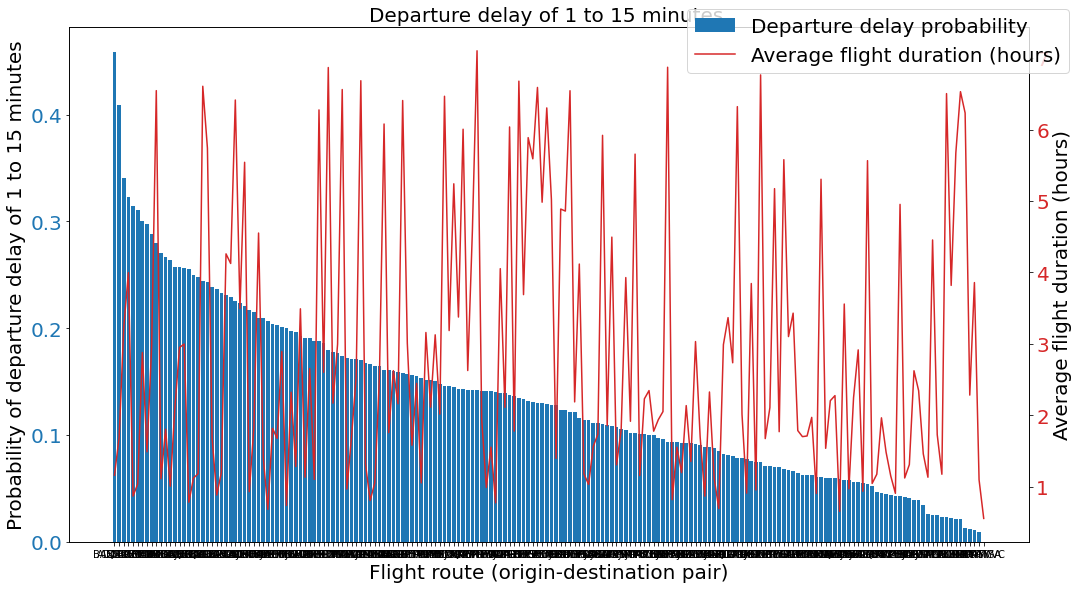



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Departure delay probabilities in descending orde

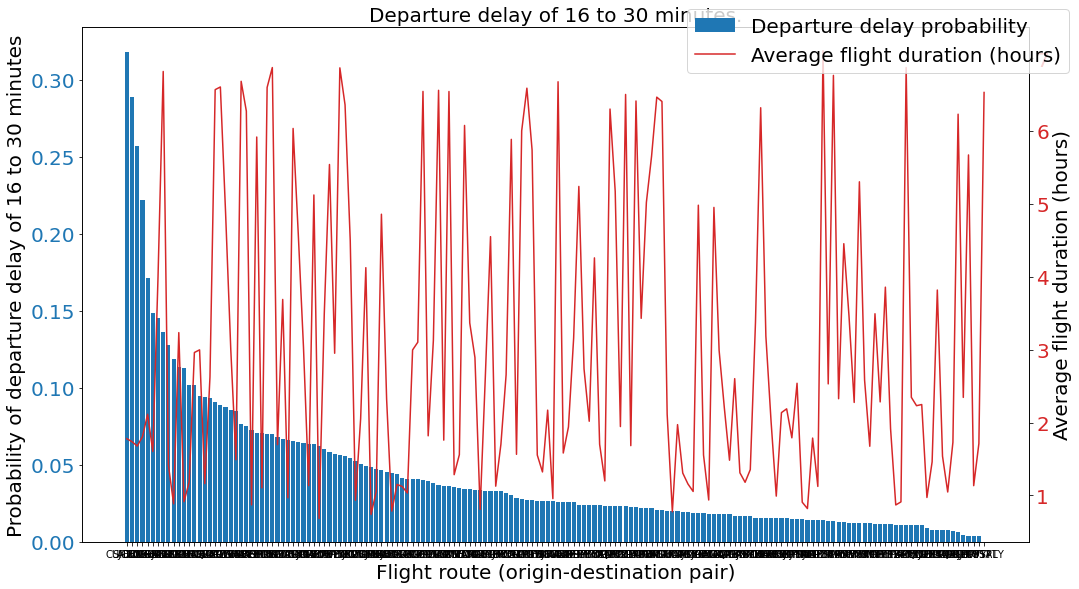



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Departure delay probabilities in descending orde

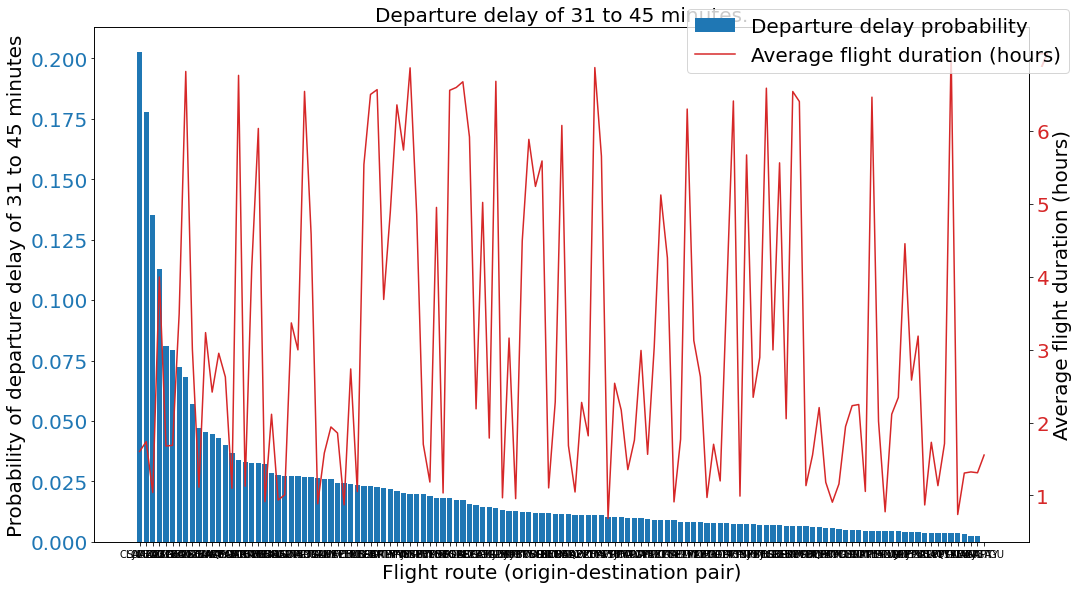



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Departure delay probabilities in descending orde

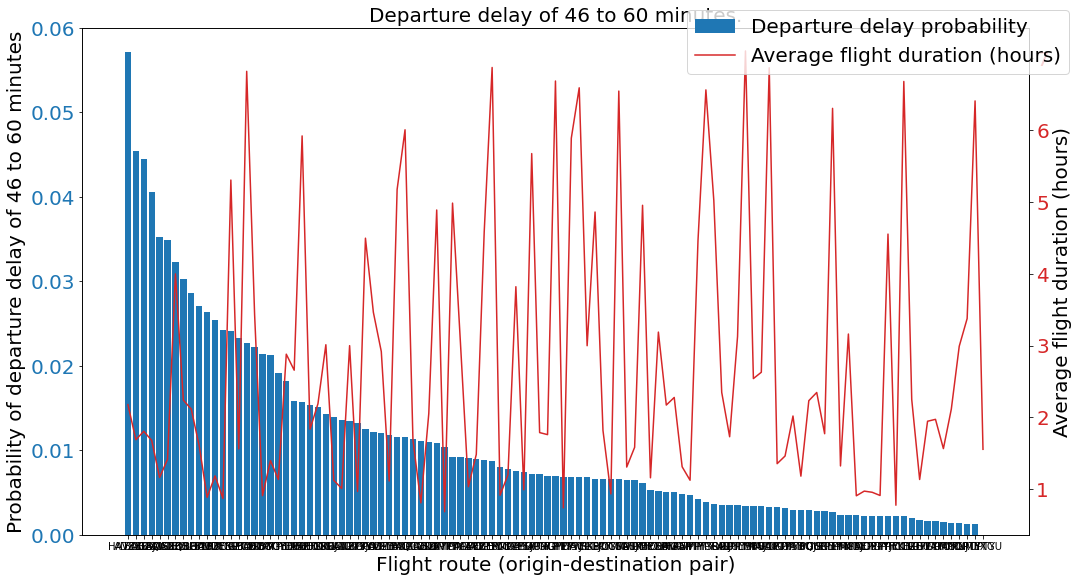



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Departure delay probabilities in descending orde

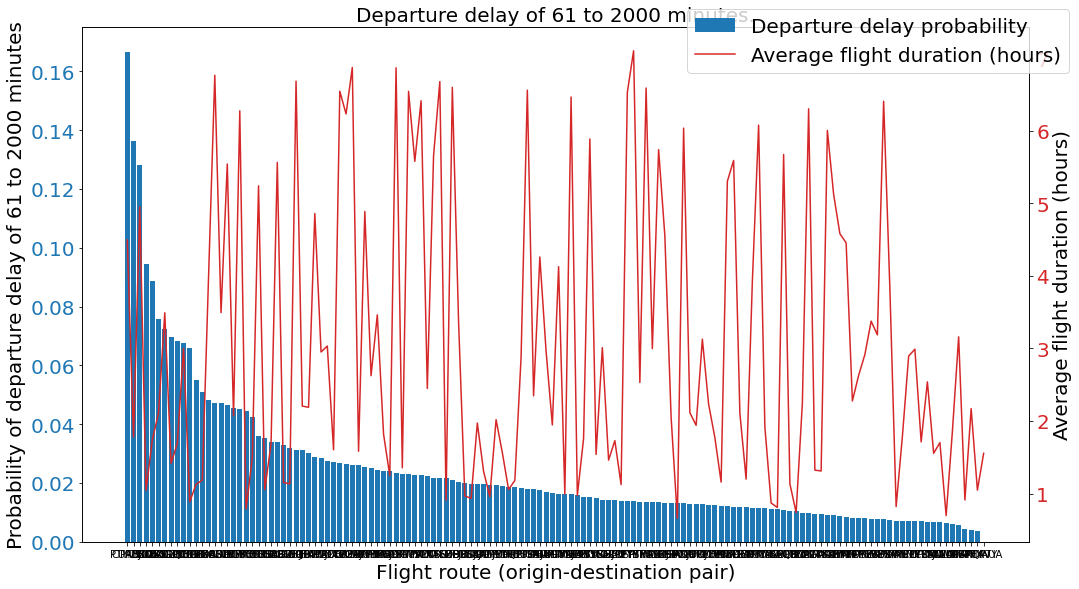

In [6]:
flight_count_1D = numpy.zeros (n_OD)

interval_start_1D = [0, 15, 30, 45, 60]
interval_stop_1D = [15, 30, 45, 60, 2000]

delay_valid_2D = data_frame_2D [data_frame_2D ["DEP_DELAY_MINUTES"] != '?']
delay_valid_2D ["DEP_DELAY_MINUTES"] = pandas.to_numeric (delay_valid_2D ["DEP_DELAY_MINUTES"]) # Converting strings to numbers.

for i in range (n_OD):
    valid_OD_1D = delay_valid_2D.loc[(delay_valid_2D ["OD"] == OD_1D [i]), "OD"]
    flight_count_1D [i] = len (valid_OD_1D)


for index in range (len (interval_start_1D)):

    # -------------------------------------------------------------------------------------------------------------------
    # Calculating delay probabilities:
    
    delay_count_1D = numpy.zeros (n_OD)
    probability_delay_1D = numpy.zeros (n_OD)

    for i in range (n_OD):
        delayed_OD_1D = delay_valid_2D.loc[(delay_valid_2D ["OD"] == OD_1D [i]) & (delay_valid_2D ["DEP_DELAY_MINUTES"] > interval_start_1D [index]) & (delay_valid_2D ["DEP_DELAY_MINUTES"] <= interval_stop_1D [index]), "OD"]
        delay_count_1D [i] = len (delayed_OD_1D)

        if flight_count_1D [i] >= min_flights :
            probability_delay_1D [i] = delay_count_1D [i] / flight_count_1D [i]
            # print (i, "\t\t", OD_1D [i], "\t\t", delay_count_1D [i], "\t\t", flight_count_1D [i], "\t\t", probability_delay_1D [i], "\t\t", flight_duration_avg_hours_1D [i])
        else:
            print ("For route", OD_1D [i], ", number of flights <", min_flights, ". Not enough flights to calculate delay probability.")

    # -------------------------------------------------------------------------------------------------------------------
    # Sorting delay probabilities in descending order:
    
    descend_sort_prob_delay_1D = numpy.sort (probability_delay_1D)[::-1]

    descending_delay_prob_indices_1D = []
    max_delay_prob_OD_1D = []

    c = 0
    while len (descending_delay_prob_indices_1D) < len (OD_1D):
        # if not numpy.isnan (descend_sort_prob_dep_delay_1to15_1D [c]):
        descending_delay_prob_indices_1D.append (numpy.where (probability_delay_1D == descend_sort_prob_delay_1D [c]) [0][0])
        max_delay_prob_OD_1D.append (OD_1D [descending_delay_prob_indices_1D [-1]])
        c = c + 1

    avg_flight_duration_sorted_1D = []
    
    print ("Departure delay probabilities in descending order, for delays in", interval_start_1D [index] + 1, "to", interval_stop_1D [index], "minutes range: \n")    
    print ("Index \t\t Route (OD) \t\t Delay count \t Flight count \t Departure delay probability \t Flight average duration (hours)")
    for i in range (len (descending_delay_prob_indices_1D)):
        avg_flight_duration_sorted_1D.append (flight_duration_avg_hours_1D [descending_delay_prob_indices_1D [i]])
        print (descending_delay_prob_indices_1D [i], "\t\t", max_delay_prob_OD_1D [i], "\t\t", delay_count_1D [descending_delay_prob_indices_1D [i]], "\t\t", flight_count_1D [descending_delay_prob_indices_1D [i]], "\t\t", probability_delay_1D [descending_delay_prob_indices_1D [i]], "\t\t", flight_duration_avg_hours_1D [descending_delay_prob_indices_1D [i]])


    # -------------------------------------------------------------------------------------------------------------------
    # Plotting graphs:
    
    fig, ax1 = matplotlib.pyplot.subplots(figsize=(15,8))
    # matplotlib.pyplot.figure (figsize = (15, 8))

    color = 'tab:blue'
    ax1.bar (max_delay_prob_OD_1D, descend_sort_prob_delay_1D, color = color, label = "Departure delay probability")
    ax1.set_xlabel ("Flight route (origin-destination pair)", fontsize = 20)
    ax1.set_ylabel ("Probability of departure delay of " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes", fontsize = 20)
    ax1.tick_params (axis = 'y', labelcolor = color)
    matplotlib.pyplot.yticks (fontsize = 20)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.plot (max_delay_prob_OD_1D, avg_flight_duration_sorted_1D, color = color, label = "Average flight duration (hours)")
    ax2.tick_params (axis = 'y', labelcolor = color)
    ax2.set_ylabel ("Average flight duration (hours)", fontsize = 20)

    fig.tight_layout ()  # otherwise the right y-label is slightly clipped
    fig.legend (prop = {"size" : 20})
    matplotlib.pyplot.yticks (fontsize = 20)
    matplotlib.pyplot.title ("Departure delay of " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes.", fontsize = 20)
    fig.savefig ("Plot - departure delay " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes - probability and flight duration vs origin-destination pair")
    
    matplotlib.pyplot.show ()
    
    # -------------------------------------------------------------------------------------------------------------------

    print ("\n ============================================================================================================== ")
    print (" ============================================================================================================== \n")

# Arrival delay probablities

<ipython-input-7-10017de59dcf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_valid_2D ["ARR_DELAY_MINUTES"] = pandas.to_numeric (delay_valid_2D ["ARR_DELAY_MINUTES"]) # Converting strings to numbers.


For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Arrival delay probabilities in descending order, f

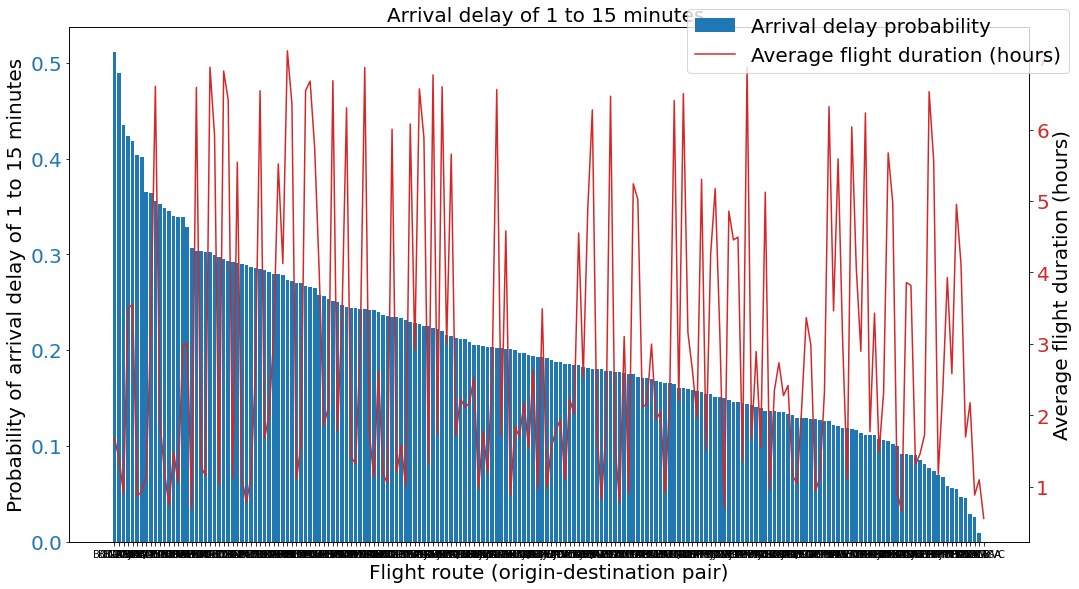



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Arrival delay probabilities in descending order,

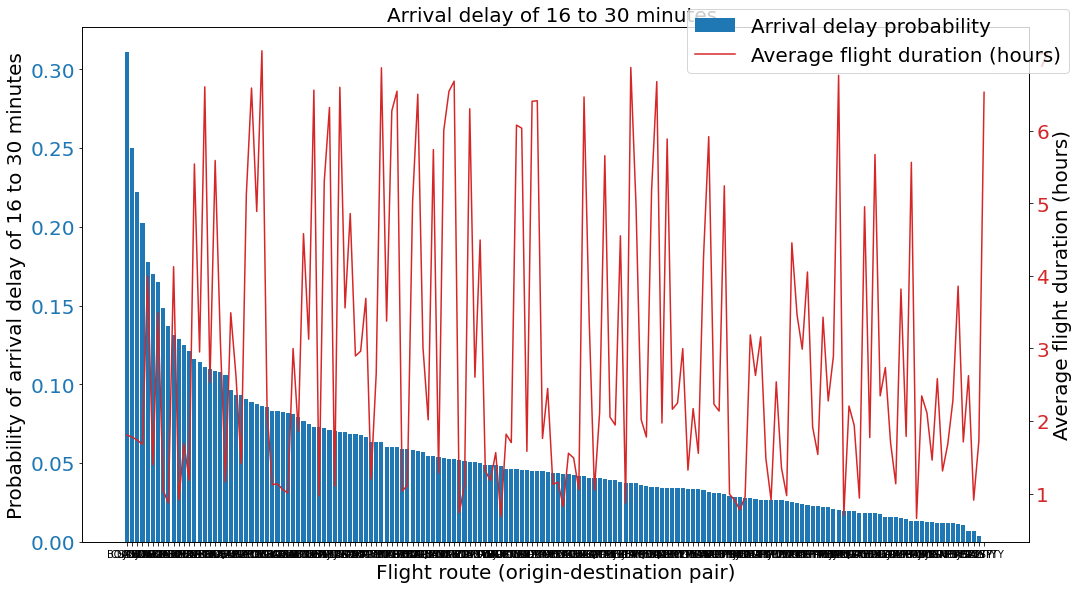



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Arrival delay probabilities in descending order,

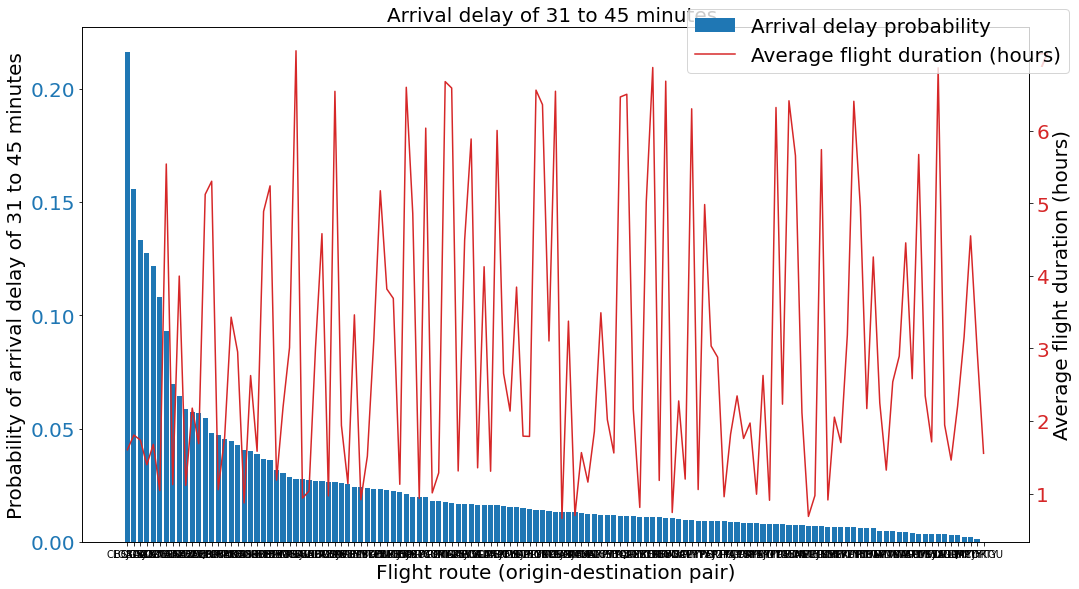



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Arrival delay probabilities in descending order,

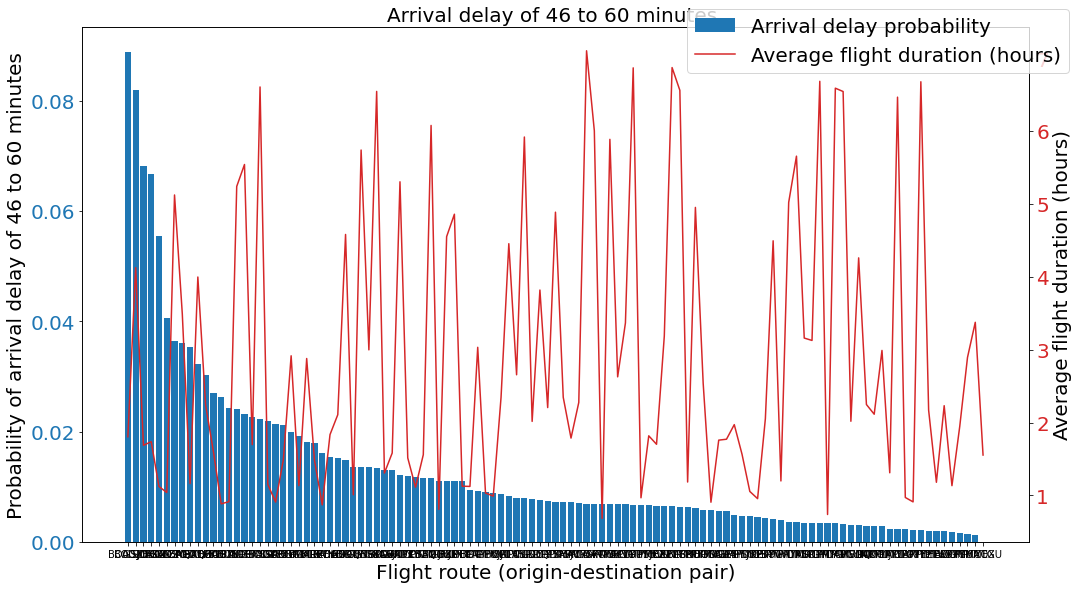



For route BOGVVC , number of flights < 30 . Not enough flights to calculate delay probability.
For route VVCBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route PTYBLB , number of flights < 30 . Not enough flights to calculate delay probability.
For route BLBPTY , number of flights < 30 . Not enough flights to calculate delay probability.
For route AUABOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGAUA , number of flights < 30 . Not enough flights to calculate delay probability.
For route YYZYUL , number of flights < 30 . Not enough flights to calculate delay probability.
For route STIBOG , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGSTI , number of flights < 30 . Not enough flights to calculate delay probability.
For route BOGMDE , number of flights < 30 . Not enough flights to calculate delay probability.
Arrival delay probabilities in descending order,

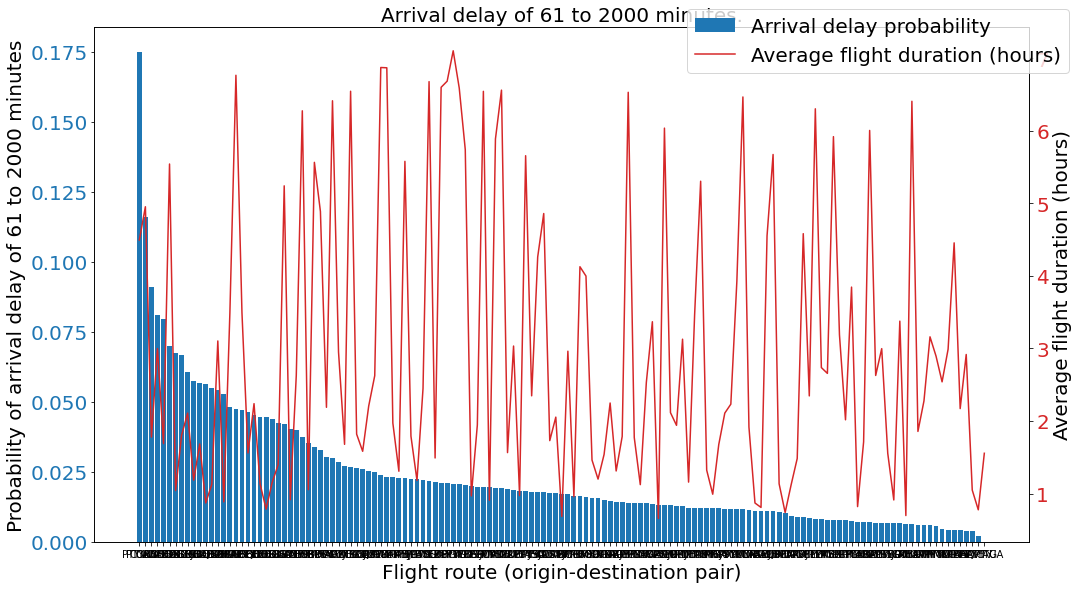

In [7]:
flight_count_1D = numpy.zeros (n_OD)

interval_start_1D = [0, 15, 30, 45, 60]
interval_stop_1D = [15, 30, 45, 60, 2000]

delay_valid_2D = data_frame_2D [data_frame_2D ["ARR_DELAY_MINUTES"] != '?']
delay_valid_2D ["ARR_DELAY_MINUTES"] = pandas.to_numeric (delay_valid_2D ["ARR_DELAY_MINUTES"]) # Converting strings to numbers.

for i in range (n_OD):
    valid_OD_1D = delay_valid_2D.loc[(delay_valid_2D ["OD"] == OD_1D [i]), "OD"]
    flight_count_1D [i] = len (valid_OD_1D)


for index in range (len (interval_start_1D)):

    # -------------------------------------------------------------------------------------------------------------------
    # Calculating delay probabilities:
    
    delay_count_1D = numpy.zeros (n_OD)
    probability_delay_1D = numpy.zeros (n_OD)

    for i in range (n_OD):
        delayed_OD_1D = delay_valid_2D.loc[(delay_valid_2D ["OD"] == OD_1D [i]) & (delay_valid_2D ["ARR_DELAY_MINUTES"] > interval_start_1D [index]) & (delay_valid_2D ["ARR_DELAY_MINUTES"] <= interval_stop_1D [index]), "OD"]
        delay_count_1D [i] = len (delayed_OD_1D)

        if flight_count_1D [i] >= min_flights :
            probability_delay_1D [i] = delay_count_1D [i] / flight_count_1D [i]
            # print (i, "\t\t", OD_1D [i], "\t\t", delay_count_1D [i], "\t\t", flight_count_1D [i], "\t\t", probability_delay_1D [i], "\t\t", flight_duration_avg_hours_1D [i])
        else:
            print ("For route", OD_1D [i], ", number of flights <", min_flights, ". Not enough flights to calculate delay probability.")

    # -------------------------------------------------------------------------------------------------------------------
    # Sorting delay probabilities in descending order:
    
    descend_sort_prob_delay_1D = numpy.sort (probability_delay_1D)[::-1]

    descending_delay_prob_indices_1D = []
    max_delay_prob_OD_1D = []

    c = 0
    while len (descending_delay_prob_indices_1D) < len (OD_1D):
        # if not numpy.isnan (descend_sort_prob_dep_delay_1to15_1D [c]):
        descending_delay_prob_indices_1D.append (numpy.where (probability_delay_1D == descend_sort_prob_delay_1D [c]) [0][0])
        max_delay_prob_OD_1D.append (OD_1D [descending_delay_prob_indices_1D [-1]])
        c = c + 1

    avg_flight_duration_sorted_1D = []
    
    print ("Arrival delay probabilities in descending order, for delays in", interval_start_1D [index] + 1, "to", interval_stop_1D [index], "minutes range: \n")    
    print ("Index \t\t Route (OD) \t\t Delay count \t Flight count \t Arrival delay probability \t Flight average duration (hours)")
    for i in range (len (descending_delay_prob_indices_1D)):
        avg_flight_duration_sorted_1D.append (flight_duration_avg_hours_1D [descending_delay_prob_indices_1D [i]])
        print (descending_delay_prob_indices_1D [i], "\t\t", max_delay_prob_OD_1D [i], "\t\t", delay_count_1D [descending_delay_prob_indices_1D [i]], "\t\t", flight_count_1D [descending_delay_prob_indices_1D [i]], "\t\t", probability_delay_1D [descending_delay_prob_indices_1D [i]], "\t\t", flight_duration_avg_hours_1D [descending_delay_prob_indices_1D [i]])


    # -------------------------------------------------------------------------------------------------------------------
    # Plotting graphs:
    
    fig, ax1 = matplotlib.pyplot.subplots (figsize = (15, 8))
    # matplotlib.pyplot.figure (figsize = (15, 8))

    color = 'tab:blue'
    ax1.bar (max_delay_prob_OD_1D, descend_sort_prob_delay_1D, color = color, label = "Arrival delay probability")
    ax1.set_xlabel ("Flight route (origin-destination pair)", fontsize = 20)
    ax1.set_ylabel ("Probability of arrival delay of " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes", fontsize = 20)
    ax1.tick_params (axis = 'y', labelcolor = color)
    matplotlib.pyplot.yticks (fontsize = 20)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.plot (max_delay_prob_OD_1D, avg_flight_duration_sorted_1D, color = color, label = "Average flight duration (hours)")
    ax2.tick_params (axis = 'y', labelcolor = color)
    ax2.set_ylabel ("Average flight duration (hours)", fontsize = 20)

    fig.tight_layout ()  # otherwise the right y-label is slightly clipped
    fig.legend (prop = {"size" : 20})
    matplotlib.pyplot.yticks (fontsize = 20)
    matplotlib.pyplot.title ("Arrival delay of " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes.", fontsize = 20)
    fig.savefig ("Plot - arrival delay " + str (interval_start_1D [index] + 1) + " to " + str (interval_stop_1D [index]) + " minutes - probability and flight duration vs origin-destination pair")
    
    matplotlib.pyplot.show ()
    
    # -------------------------------------------------------------------------------------------------------------------

    print ("\n ============================================================================================================== ")
    print (" ============================================================================================================== \n")